In [1]:
import pandas as pd
import plotly
import matplotlib as mpl
import numpy as np
import os
import feature_maker as fm
from itertools import repeat



In [3]:
lobith_dbs = {}
for file in os.listdir('../lobith/'):
    raw_db = pd.read_csv('../lobith/' + file,sep = ';')
    raw_db['NUMERIEKEWAARDE'] =  raw_db['NUMERIEKEWAARDE'].str.replace(',', '.').astype(float)
    db = pd.DataFrame(raw_db['NUMERIEKEWAARDE'])
    db['datetime'] = pd.to_datetime(raw_db['WAARNEMINGDATUM'] + ' ' + raw_db['WAARNEMINGTIJD (MET/CET)'],format='%d-%m-%Y %H:%M:%S')
    db = db.set_index('datetime',drop=False)
    db = db[~db.index.duplicated(keep='last')]
    db = db[np.logical_and(db['NUMERIEKEWAARDE'] < 1000000, db['NUMERIEKEWAARDE'] > 0)]
    lobith_dbs[file] = db

In [4]:
lobith_db = pd.concat(lobith_dbs.values()) 
lobith_db = lobith_db[~lobith_db.index.duplicated(keep='last')]
lobith_db


,NUMERIEKEWAARDE,datetime
datetime,,
2015-01-01 00:00:00,2262.44,2015-01-01 00:00:00
2015-01-01 00:10:00,2236.17,2015-01-01 00:10:00
2015-01-01 00:20:00,2234.98,2015-01-01 00:20:00
2015-01-01 00:30:00,2242.44,2015-01-01 00:30:00
2015-01-01 00:40:00,2234.98,2015-01-01 00:40:00
...,...,...
2022-08-04 10:00:00,825.52,2022-08-04 10:00:00
2022-08-04 10:10:00,825.52,2022-08-04 10:10:00
2022-08-04 10:20:00,821.82,2022-08-04 10:20:00


In [5]:
lobith_db = lobith_db.rename(columns={'NUMERIEKEWAARDE':'lobith_debiet'})
lobith_db.columns

Index(['lobith_debiet', 'datetime'], dtype='object')

<AxesSubplot:xlabel='datetime'>

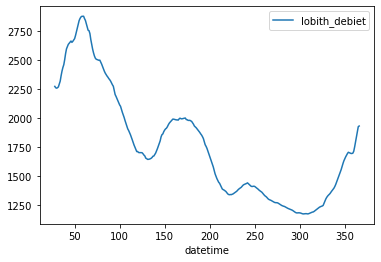

In [6]:
lobith_db.groupby(lobith_db.index.dayofyear).median().rolling(28).mean().plot()

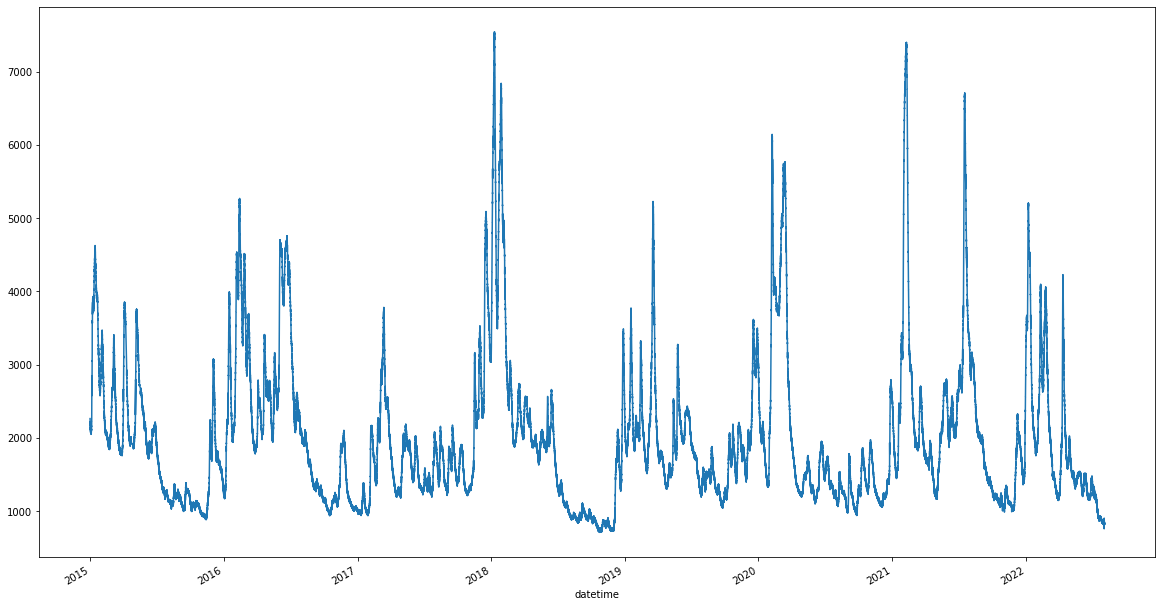

In [7]:
plot =lobith_db['lobith_debiet'].plot(figsize=(1920/96,1080/96)).figure

In [8]:
db = pd.read_csv('E:\Rprojects\zoutindringing-parksluizen\debiet\DebietParksluizen.csv',skiprows = 1)
db.columns = ('datetime','waarde','kwaliteit')
db['datetime'] = pd.to_datetime(db['datetime'])
db['mins'] = db['datetime'].dt.minute % 10
db = db[db['mins'] == 0]
db = db.drop('mins',axis =1)
db = db.reset_index(drop = True)
db = db.set_index('datetime')
db['waarde'] = pd.to_numeric(db['waarde'])



In [9]:
import debiet_parser_featurizer as dpf

In [10]:
db = dpf.parse_debiet()
db = dpf.featurize_debiet(db).dataset


In [11]:
db.columns

Index(['datetime', 'debiet_gemaal', 'is_active', 'count_on', 'count_off'], dtype='object')

In [12]:
print(db)

                               datetime  debiet_gemaal  is_active  count_on  \
datetime                                                                      
2012-09-05 13:30:00 2012-09-05 13:30:00         221.41        NaN       NaN   
2012-09-05 13:40:00 2012-09-05 13:40:00         222.52        NaN       NaN   
2012-09-05 13:50:00 2012-09-05 13:50:00         224.44        NaN       NaN   
2012-09-05 14:00:00 2012-09-05 14:00:00         221.41        NaN       NaN   
2012-09-05 14:10:00 2012-09-05 14:10:00         229.05        NaN       NaN   
...                                 ...            ...        ...       ...   
2022-08-08 11:50:00 2022-08-08 11:50:00           0.00        NaN       NaN   
2022-08-08 12:00:00 2022-08-08 12:00:00           0.00        NaN       NaN   
2022-08-08 12:10:00 2022-08-08 12:10:00           0.00        NaN       NaN   
2022-08-08 12:20:00 2022-08-08 12:20:00           0.00        NaN       NaN   
2022-08-08 12:30:00 2022-08-08 12:30:00           0.